In [1]:
# Mike Babb
# Plot the differences in search spaces and look up comparisons

In [2]:
# Standard
from itertools import product
import string

In [3]:
# external
from matplotlib.patches import Rectangle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
import _run_constants as rc
from part_00_file_db_utils import *
from part_00_process_functions import *

# LOAD DATA

In [5]:
sql = 'select * from word_groups;'
wg_df = query_db(sql = sql, db_path = rc.db_path,
              db_name = rc.db_name)

...query execution took: 1.55 seconds...


In [6]:
sql = 'select * from word_group_lookup_counts;'
wg_lu_df = query_db(sql = sql, db_path = rc.db_path,
              db_name = rc.db_name)

...query execution took: 2.15 seconds...


In [7]:
sql = 'select * from letter_count;'
lc_df = query_db(sql = sql, db_path = rc.db_path,
              db_name = rc.db_name)
lc_df = lc_df.sort_values(by = 'total_letter_rank')

...query execution took: 0.01 seconds...


In [8]:
letter_rank_dict = {}
for ll, lr in zip(lc_df['letter'], lc_df['total_letter_rank']):
    letter_rank_dict[ll] = lr
 

# MATRIX EXTRACTION OPTION TWO

In [9]:
wg_lu_df.head()

,word_id,word_group_id,n_chars,first_letter_id,single_letter_id,letter_selector_id,nc_ls_id,me_01_full_matrix_lookup,me_02_n_char_lookup,me_03_first_letter_lookup,me_04_single_letter_lookup,me_05_letter_selector_lookup,me_06_nc_ls_lookup
0,0,0,1,0,0,0,0,215842,215842,133001,133001,133001,133001
1,1,1,2,0,0,0,1,215842,215816,133001,133001,133001,133000
2,2,2,3,0,11,1081,2,215842,215717,133001,98258,65528,65527
3,3,3,5,0,11,1083,3,215842,211614,133001,98258,42754,42731
4,4,4,3,0,12,1114,4,215842,215717,133001,58800,38652,38651


In [10]:
wg_lu_df.loc[wg_lu_df['n_chars'] >= 8, :].shape

(170056, 13)

In [11]:
df_agg = wg_lu_df[['n_chars', 'me_02_n_char_lookup']].drop_duplicates()

..\assets\meo_2_ss.png


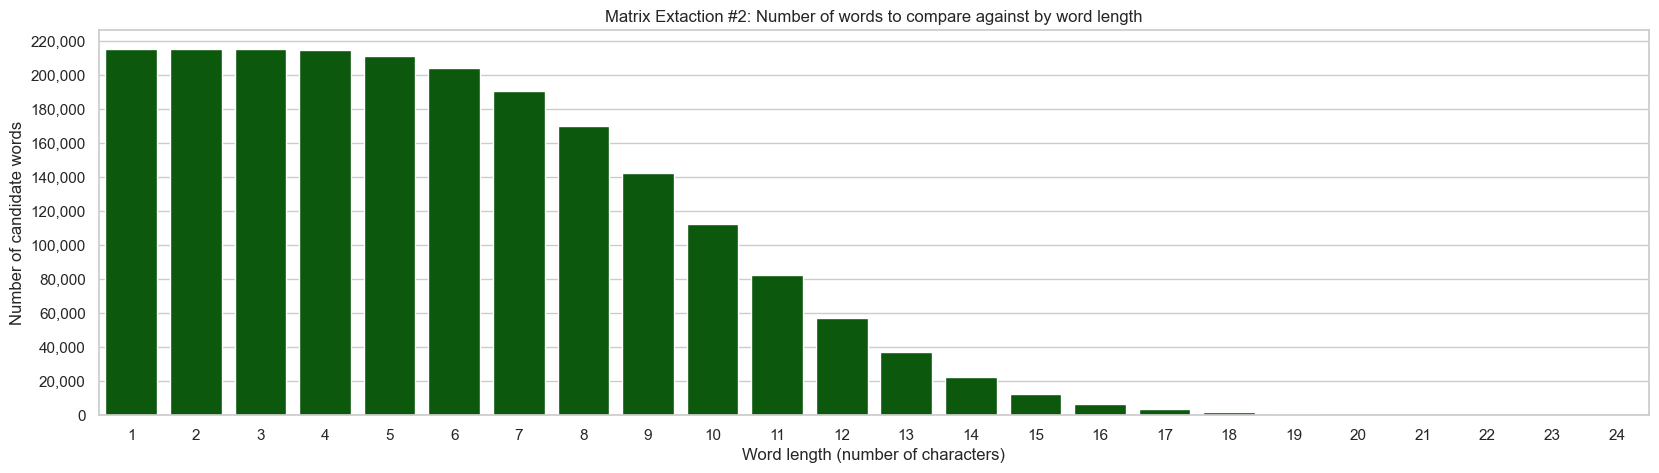

In [12]:
sns.set_theme(style = "whitegrid")
f, ax = plt.subplots(figsize = (20, 5))
my_plot = sns.barplot(df_agg, x="n_chars", y="me_02_n_char_lookup",
                      color='darkgreen')

y_tick_labels = list(range(0, 220001, 20000))
y_tick_labels_formatted = ['{:,}'.format(ytl) for ytl in y_tick_labels]   

my_plot.set_yticks(ticks = y_tick_labels)
my_plot.set_yticklabels(labels = y_tick_labels_formatted, rotation=0)


#ax.bar_label(ax.containers[0], fontsize=10)
plt.title(label = "Matrix Extaction #2: Number of words to compare against by word length")
plt.xlabel(xlabel = 'Word length (number of characters)')
plt.ylabel(ylabel = "Number of candidate words")
output_file_name = '..\\assets\\meo_2_ss.png'
output_file_name = os.path.normpath(output_file_name)
print(output_file_name)
my_plot.get_figure().savefig(fname = output_file_name)



# MATRIX EXTRACTION OPTION 3

In [13]:
df_agg = wg_lu_df[['first_letter_id', 'me_03_first_letter_lookup']].drop_duplicates()
df_agg = df_agg.sort_values(by = 'first_letter_id')
df_agg['first_letter'] = list(string.ascii_lowercase)

In [14]:
df_agg.head()

,first_letter_id,me_03_first_letter_lookup,first_letter
0,0,133001,a
16513,1,35319,b
26876,2,80811,c
45684,3,56705,d
56000,4,145106,e


..\assets\meo_3_ss.png


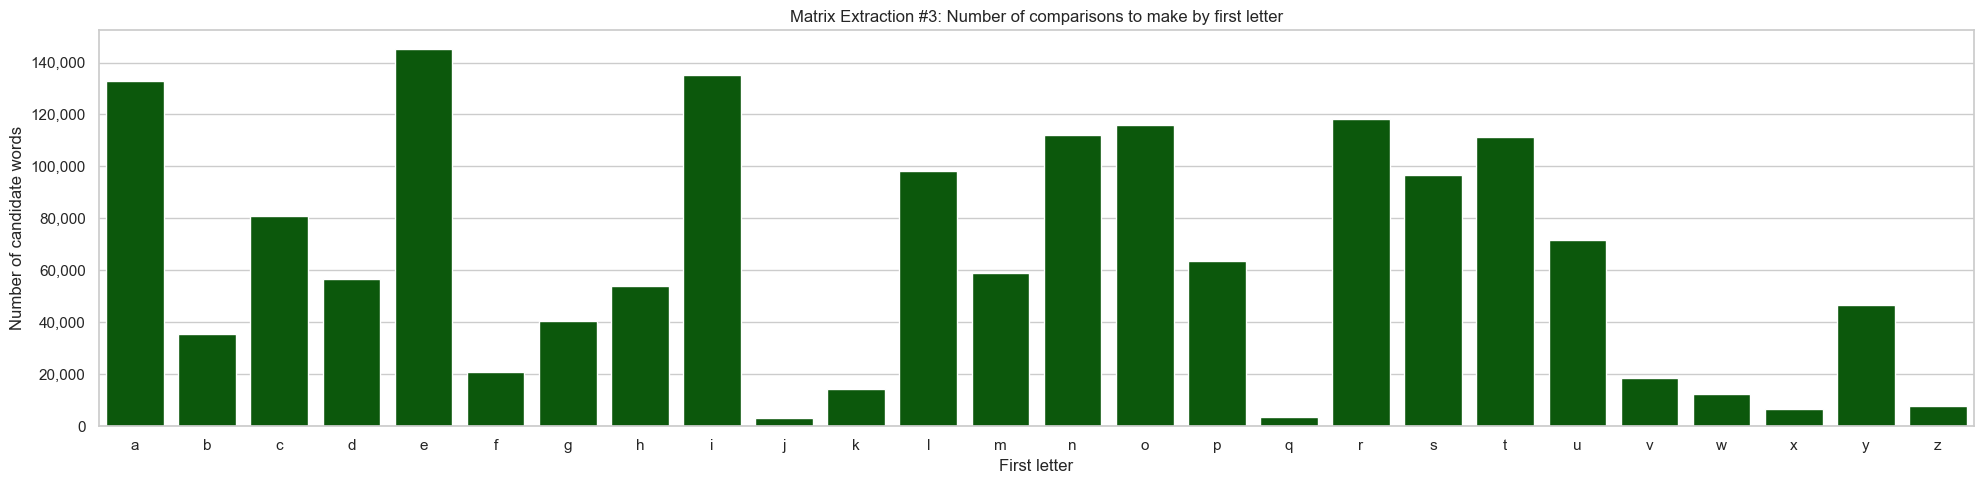

In [15]:

sns.set_theme(style = "whitegrid")
f, ax = plt.subplots(figsize = (20, 5))
my_plot = sns.barplot(df_agg, x="first_letter", y="me_03_first_letter_lookup",
                      color='darkgreen')

y_tick_labels = list(range(0, 140001, 20000))
y_tick_labels_formatted = ['{:,}'.format(ytl) for ytl in y_tick_labels]   

my_plot.set_yticks(ticks = y_tick_labels)
my_plot.set_yticklabels(labels = y_tick_labels_formatted, rotation=0)

#ax.bar_label(ax.containers[0], fontsize=10)
plt.title(label = "Matrix Extraction #3: Number of comparisons to make by first letter")
plt.xlabel(xlabel = 'First letter')
plt.ylabel(ylabel = "Number of candidate words")
output_file_name = '..\\assets\\meo_3_ss.png'
output_file_name = os.path.normpath(output_file_name)
print(output_file_name)
plt.tight_layout()
plt.show()
my_plot.get_figure().savefig(fname = output_file_name)



# LETTER RANK

In [16]:
[letter_rank_dict[ll] for ll in list('achiever')]

[3, 10, 15, 2, 1, 20, 1, 5]

..\assets\meo_4_letter_rank.png


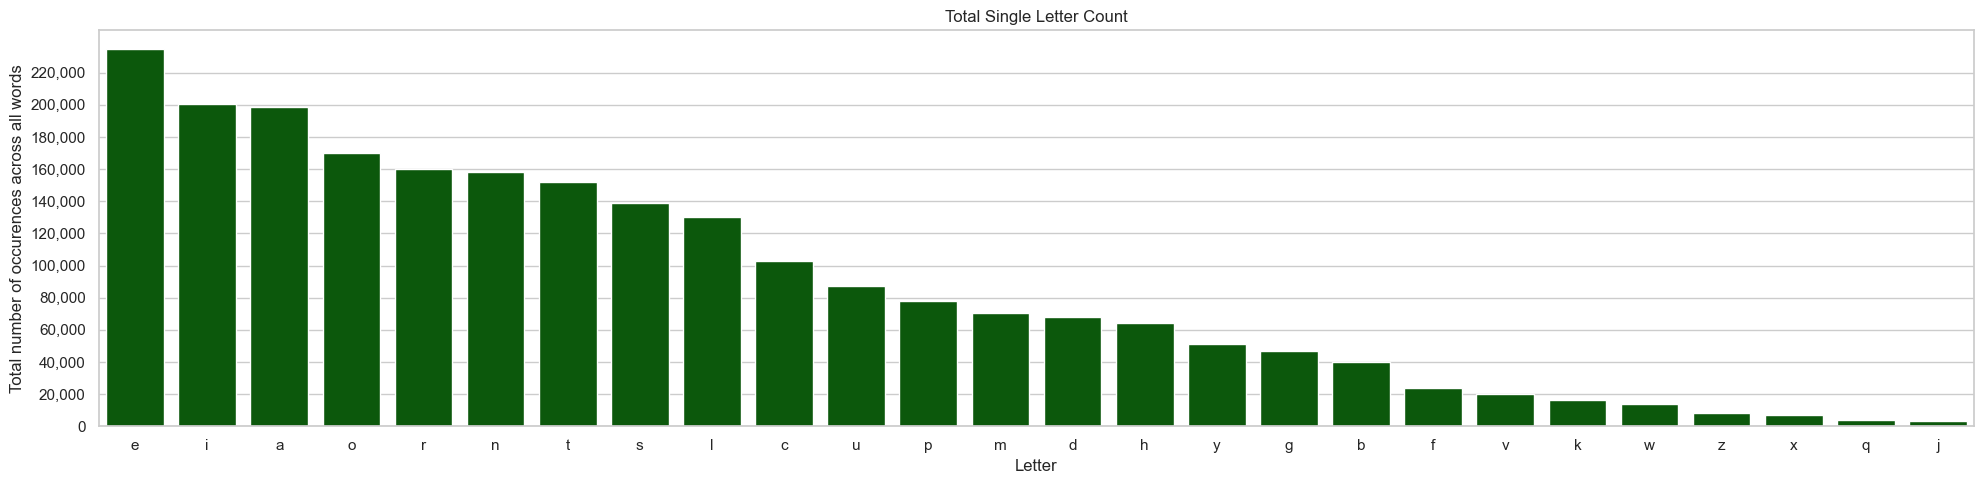

In [17]:


sns.set_theme(style = "whitegrid")

f, ax = plt.subplots(figsize = (20, 5))
my_plot = sns.barplot(lc_df, x="letter", y="total_letter_count",
                      color='darkgreen')

y_tick_labels = list(range(0, 220001, 20000))
y_tick_labels_formatted = ['{:,}'.format(ytl) for ytl in y_tick_labels]   

my_plot.set_yticks(ticks = y_tick_labels)
my_plot.set_yticklabels(labels = y_tick_labels_formatted, rotation=0)


#ax.bar_label(ax.containers[0], fontsize=10)
plt.title(label = "Total Single Letter Count")
plt.xlabel(xlabel = 'Letter')
plt.ylabel(ylabel = "Total number of occurences across all words")
output_file_name = '..\\assets\\meo_4_letter_rank.png'
output_file_name = os.path.normpath(output_file_name)
print(output_file_name)
my_plot.get_figure().savefig(fname = output_file_name)
plt.tight_layout()
plt.show()



# HEATMAP COMPARING FIRST LETTER IN A WORD TO LEAST COMMON LETTER IN A WORD

In [18]:
# build a dictionary mapping letter id to letter value
letter_dict = {l_pos:l for l_pos, l in enumerate(string.ascii_lowercase)}

In [19]:
wg_lu_df['first_letter'] = wg_lu_df['first_letter_id'].map(letter_dict)
wg_lu_df['single_letter'] = wg_lu_df['single_letter_id'].map(letter_dict)

In [20]:
wg_lu_df.head()

,word_id,word_group_id,n_chars,first_letter_id,single_letter_id,letter_selector_id,nc_ls_id,me_01_full_matrix_lookup,me_02_n_char_lookup,me_03_first_letter_lookup,me_04_single_letter_lookup,me_05_letter_selector_lookup,me_06_nc_ls_lookup,first_letter,single_letter
0,0,0,1,0,0,0,0,215842,215842,133001,133001,133001,133001,a,a
1,1,1,2,0,0,0,1,215842,215816,133001,133001,133001,133000,a,a
2,2,2,3,0,11,1081,2,215842,215717,133001,98258,65528,65527,a,l
3,3,3,5,0,11,1083,3,215842,211614,133001,98258,42754,42731,a,l
4,4,4,3,0,12,1114,4,215842,215717,133001,58800,38652,38651,a,m


In [21]:
wg_lu_df_xtb = pd.crosstab(index = wg_lu_df['first_letter'], columns = wg_lu_df['single_letter'],
                     normalize='index')

..\assets\meo_4_first_letter_starting_letter.png


<Figure size 1920x1440 with 0 Axes>

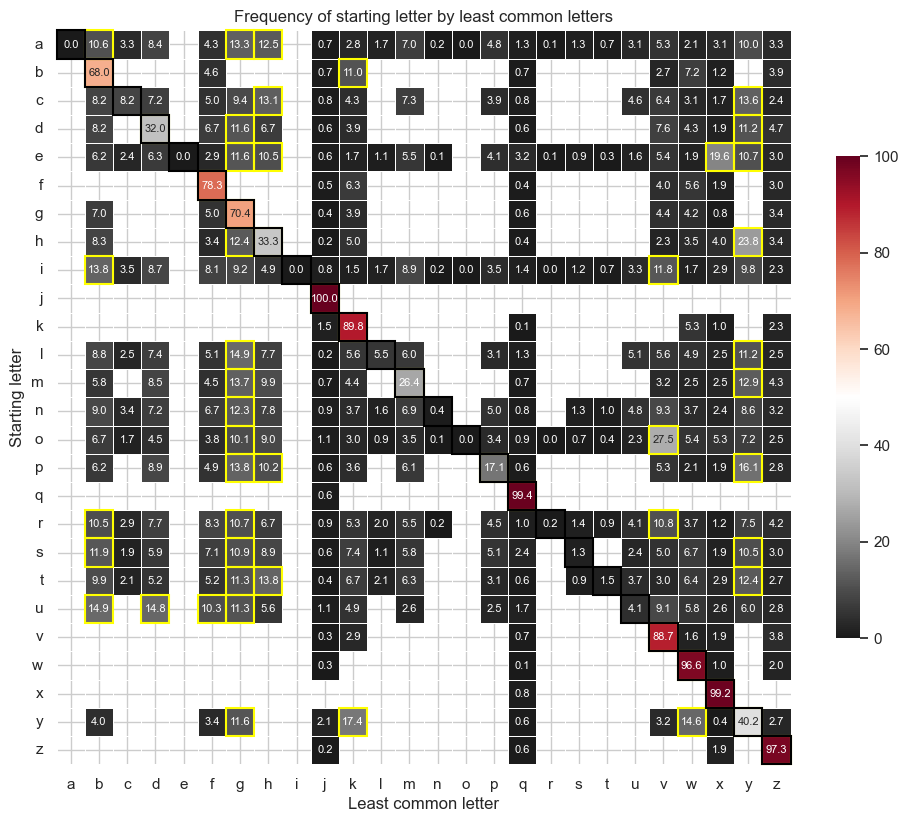

In [22]:
im_data = wg_lu_df_xtb.to_numpy()
im_data = im_data * 100
im_data_mask = im_data == 0
sns.set_theme(style = "whitegrid")
plt.figure(dpi = 300)

norm = plt.Normalize(im_data.min(), im_data.max())


f, ax = plt.subplots(figsize = (10, 10))
my_plot = sns.heatmap(data = im_data, cmap = 'RdGy_r', norm = norm,
            square = True, linewidths=.5, cbar_kws={'shrink':.5},
            annot=True, fmt='.1f',
            annot_kws={"size": 8},
            mask = im_data_mask,
            xticklabels=wg_lu_df_xtb.columns)            

# now, let's highlight cells greater than 10
for ii in range(0, 26):
    for jj in range(0, 26):
        if im_data[jj, ii] >= 10:            
            ax.add_patch(Rectangle((ii, jj), 1, 1, fill=False, edgecolor='yellow', lw=1.5, clip_on=False))
        
        #if im_data[jj, ii] >= 5 and im_data[jj, ii] < 10:            
        #    ax.add_patch(Rectangle((ii, jj), 1, 1, fill=False, edgecolor='white', lw=1.5, clip_on=False))

# add shading around the diagonal
for ii in range(0, 26):
    ax.add_patch(Rectangle((ii, ii), 1, 1, fill=False, edgecolor='black', lw=1.5, clip_on=False))

my_plot.set_yticklabels(labels = wg_lu_df_xtb.columns, rotation=0)
plt.title(label = "Frequency of starting letter by least common letters")
plt.xlabel(xlabel = 'Least common letter')
plt.ylabel(ylabel = "Starting letter")
output_file_name = '..\\assets\\meo_4_first_letter_starting_letter.png'
output_file_name = os.path.normpath(output_file_name)
print(output_file_name)
my_plot.get_figure().savefig(fname = output_file_name)
plt.tight_layout()
plt.show()

In [23]:
# compute the differences between the matrix extraction techniques

In [24]:
# build the letter selector
wg_df['letter_selector'] = wg_df['letter_group_ranked'].str[:3]

In [25]:
# the number of groups by letter selector length
pd.Series(wg_df['letter_selector'].unique()).str.len().value_counts()

3    2250
2     111
1      26
Name: count, dtype: int64

In [26]:
wg_df.head()

,word,lcase,n_chars,first_letter,word_id,word_group_id,letter_group,letter_group_ranked,word_group_count,letter_selector
0,A,a,1,a,0,0,a,a,1,a
1,aa,aa,2,a,1,1,a,a,1,a
2,aal,aal,3,a,2,2,al,la,2,la
3,aalii,aalii,5,a,3,3,ail,lai,1,lai
4,aam,aam,3,a,4,4,am,ma,2,ma


In [27]:
# join the word group dataframes
left_col_names = ['first_letter', 'n_chars', 'word_group_id', 'letter_selector']
right_col_names = ['word_group_id', 'first_letter_id', 'letter_selector_id', 
                   'me_03_first_letter_lookup', 'me_04_single_letter_lookup',
                   'me_05_letter_selector_lookup', 'me_06_nc_ls_lookup']
c_wg_df = pd.merge(left = wg_df[left_col_names],
                   right = wg_lu_df[right_col_names])

In [28]:
# aggregate by first letter and the counts of lookups
group_by_cols = ['first_letter', 'me_03_first_letter_lookup',
       'me_04_single_letter_lookup', 'me_05_letter_selector_lookup',
       'me_06_nc_ls_lookup']
wg_agg_df = c_wg_df[group_by_cols].groupby(by = group_by_cols[:-4]).agg(
    first_letter_lookup = ('me_03_first_letter_lookup', 'sum'),
    single_letter_lookup = ('me_04_single_letter_lookup', 'sum'),
    letter_selector_lookup =('me_05_letter_selector_lookup', 'sum'),
    nc_ls_lookup = ('me_06_nc_ls_lookup', 'sum')).reset_index()

col_names = ['single_letter_lookup','letter_selector_lookup','nc_ls_lookup']
for cn in col_names:
    new_cn = cn + '_diff'
    wg_agg_df[new_cn] = ((wg_agg_df['first_letter_lookup'] - wg_agg_df[cn]) / wg_agg_df['first_letter_lookup']) * 100

# MATRIX EXTRACTION OPTION 4

..\assets\meo_4_letter_lookup_diff.png


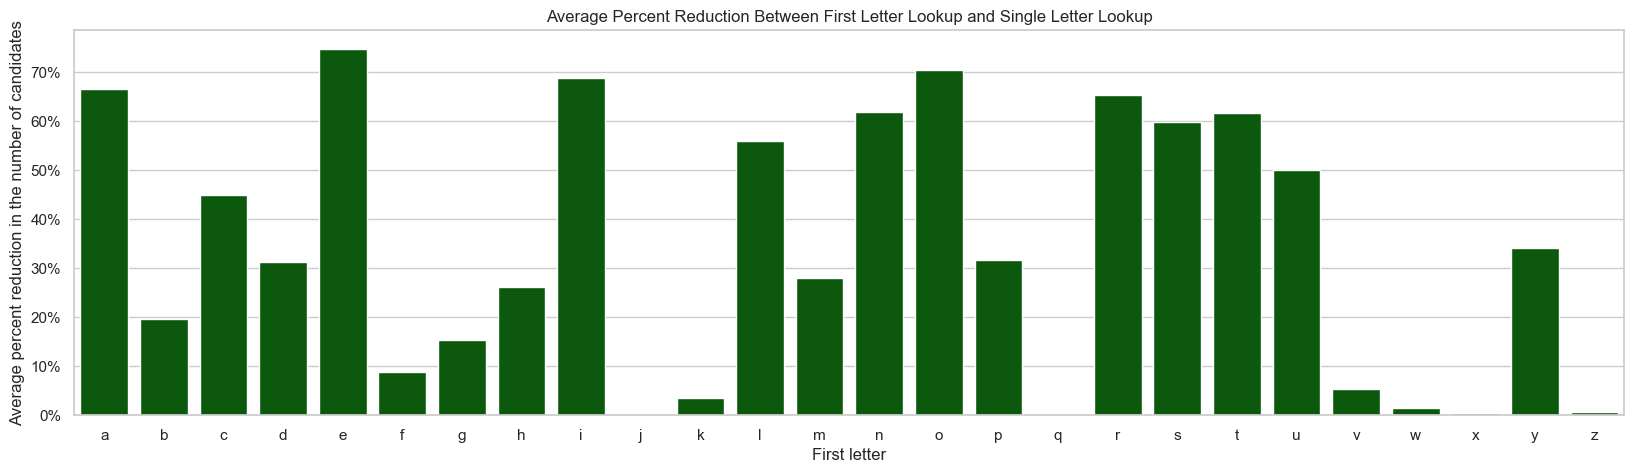

In [29]:
sns.set_theme(style = "whitegrid")
f, ax = plt.subplots(figsize = (20, 5))

my_plot = sns.barplot(data=wg_agg_df, x="first_letter", y="single_letter_lookup_diff",
                      color='darkgreen')


y_ticks = list(range(0, 80, 10))
y_tick_labels_formatted = ['{:.0%}'.format(ytl/100) for ytl in y_ticks]   

my_plot.set_yticks(ticks = y_ticks)
my_plot.set_yticklabels(labels = y_tick_labels_formatted, rotation=0)


#ax.bar_label(ax.containers[0], fontsize=10)
plt.title(label = "Average Percent Reduction Between First Letter Lookup and Single Letter Lookup")
plt.xlabel(xlabel = 'First letter')
plt.ylabel(ylabel = "Average percent reduction in the number of candidates")
output_file_name = '..\\assets\\meo_4_letter_lookup_diff.png'
output_file_name = os.path.normpath(output_file_name)
print(output_file_name)
my_plot.get_figure().savefig(fname = output_file_name)



# MATRIX EXTRACTION OPTION 5

In [30]:
wg_df.loc[wg_df['lcase'] == 'achiever', 'word_group_id']

1329    1329
Name: word_group_id, dtype: int64

In [31]:
c_wg_df.head()

,first_letter,n_chars,word_group_id,letter_selector,first_letter_id,letter_selector_id,me_03_first_letter_lookup,me_04_single_letter_lookup,me_05_letter_selector_lookup,me_06_nc_ls_lookup
0,a,1,0,a,0,0,133001,133001,133001,133001
1,a,2,1,a,0,0,133001,133001,133001,133000
2,a,3,2,la,0,1081,133001,98258,65528,65527
3,a,5,3,lai,0,1083,133001,98258,42754,42731
4,a,3,4,ma,0,1114,133001,58800,38652,38651


In [32]:
col_names = ['letter_selector_id', 'letter_selector', 'me_05_letter_selector_lookup', 'first_letter']
#ls_df = c_wg_df[col_names].drop_duplicates()
ls_df = c_wg_df[col_names].groupby(col_names[:-1]).agg( number_of_lookups = ('first_letter', 'size')).reset_index()

In [33]:
ls_df['ls_length'] = ls_df['letter_selector'].str.len()

In [34]:
ls_df.head()

,letter_selector_id,letter_selector,me_05_letter_selector_lookup,number_of_lookups,ls_length
0,0,a,133001,2,1
1,1,ae,84952,1,2
2,2,ai,82414,1,2
3,3,b,35319,1,1
4,4,ba,23469,4,2


In [35]:
ls_df.shape

(2387, 5)

In [36]:
ls_df['me_05_letter_selector_lookup'].describe()

count      2387.000000
mean       7444.399665
std       13775.994922
min           1.000000
25%         340.000000
50%        1665.000000
75%        8655.500000
max      145106.000000
Name: me_05_letter_selector_lookup, dtype: float64

In [37]:
ls_df.head()

,letter_selector_id,letter_selector,me_05_letter_selector_lookup,number_of_lookups,ls_length
0,0,a,133001,2,1
1,1,ae,84952,1,2
2,2,ai,82414,1,2
3,3,b,35319,1,1
4,4,ba,23469,4,2


In [38]:
# compute the log to make visualization more accessible
ls_df['me_05_letter_selector_lookup_log'] = np.log10(ls_df['me_05_letter_selector_lookup'])

..\assets\meo_5_letter_selector_group_size.png


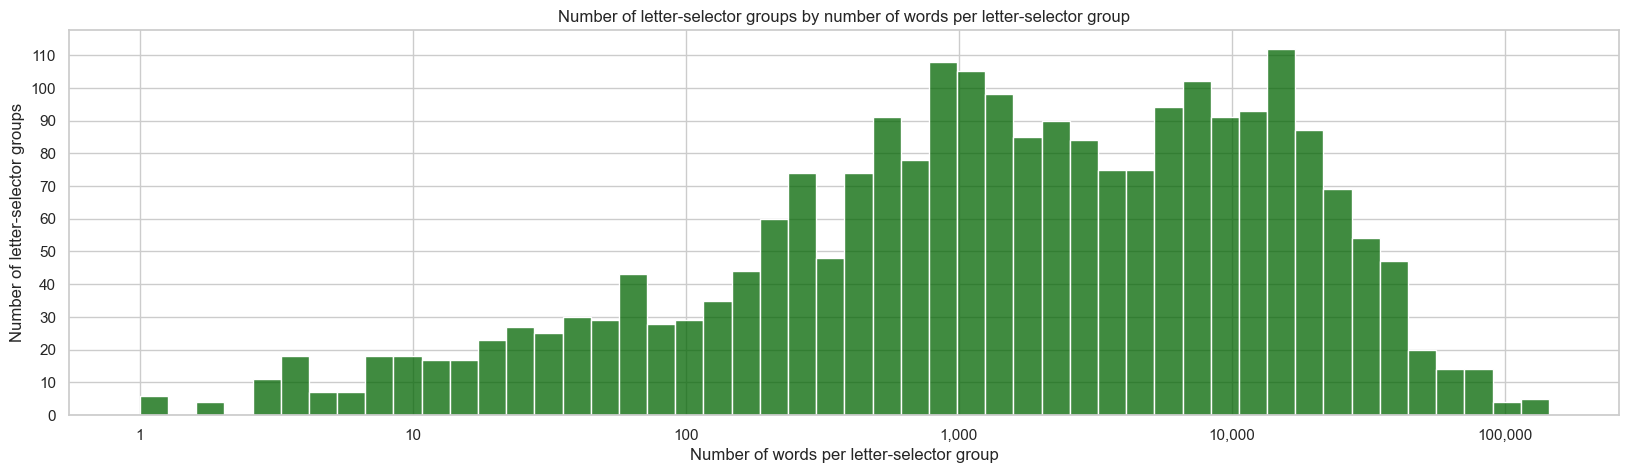

In [39]:
sns.set_theme(style = "whitegrid")
f, ax = plt.subplots(figsize = (20, 5))

my_plot = sns.histplot(data = ls_df, x = 'me_05_letter_selector_lookup_log',
                      color='darkgreen', bins = 50)

y_tick_labels = list(range(0, 111, 10))
y_tick_labels_formatted = ['{:,}'.format(ytl) for ytl in y_tick_labels]   

my_plot.set_yticks(ticks = y_tick_labels)
my_plot.set_yticklabels(labels = y_tick_labels_formatted, rotation=0)

x_ticks = list(range(0,6))
x_tick_labels_formatted = ['{:,}'.format(10**xtl) for xtl in x_ticks]   

my_plot.set_xticks(ticks = x_ticks)
my_plot.set_xticklabels(labels = x_tick_labels_formatted, rotation=0)

plt.title(label = "Number of letter-selector groups by number of words per letter-selector group")
plt.xlabel(xlabel = 'Number of words per letter-selector group')
plt.ylabel(ylabel = "Number of letter-selector groups")


output_file_name = '..\\assets\\meo_5_letter_selector_group_size.png'
output_file_name = os.path.normpath(output_file_name)
print(output_file_name)
my_plot.get_figure().savefig(fname = output_file_name)

In [40]:
ls_df.head()

,letter_selector_id,letter_selector,me_05_letter_selector_lookup,number_of_lookups,ls_length,me_05_letter_selector_lookup_log
0,0,a,133001,2,1,5.123855
1,1,ae,84952,1,2,4.929174
2,2,ai,82414,1,2,4.916001
3,3,b,35319,1,1,4.548008
4,4,ba,23469,4,2,4.370495


..\assets\meo_5_comparisons_by_letter_selector_group_size.png


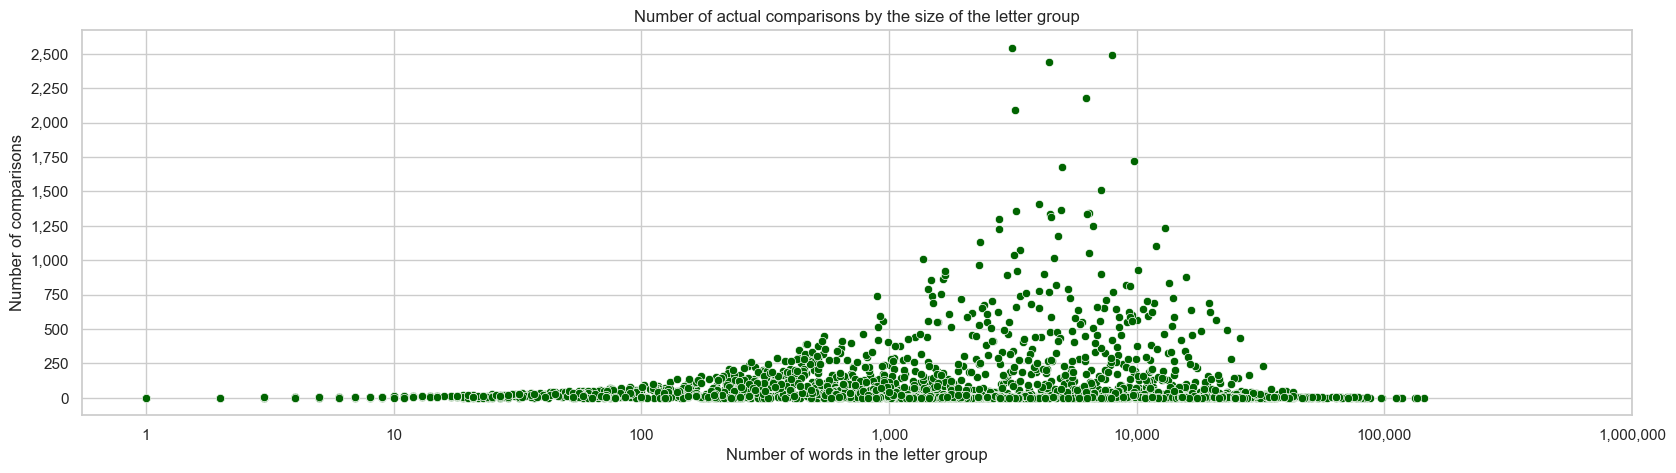

In [41]:
sns.set_theme(style = "whitegrid")
f, ax = plt.subplots(figsize = (20, 5))

# scatter plot of number of candidates by the actual candidates
my_plot = sns.scatterplot(data = ls_df, x = 'me_05_letter_selector_lookup_log',
                y = 'number_of_lookups', color='darkgreen')

y_tick_labels = list(range(0, 2501, 250))
y_tick_labels_formatted = ['{:,}'.format(ytl) for ytl in y_tick_labels]   

my_plot.set_yticks(ticks = y_tick_labels)
my_plot.set_yticklabels(labels = y_tick_labels_formatted, rotation=0)

x_ticks = list(range(0,7))
x_tick_labels_formatted = ['{:,}'.format(10**xtl) for xtl in x_ticks]   

my_plot.set_xticks(ticks = x_ticks)
my_plot.set_xticklabels(labels = x_tick_labels_formatted, rotation=0)




plt.title(label = "Number of actual comparisons by the size of the letter group")
plt.xlabel(xlabel = 'Number of words in the letter group')
plt.ylabel(ylabel = "Number of comparisons")

output_file_name = '..\\assets\\meo_5_comparisons_by_letter_selector_group_size.png'
output_file_name = os.path.normpath(output_file_name)
print(output_file_name)
my_plot.get_figure().savefig(fname = output_file_name)

..\assets\meo_5_letter_selector_lookup_diff.png


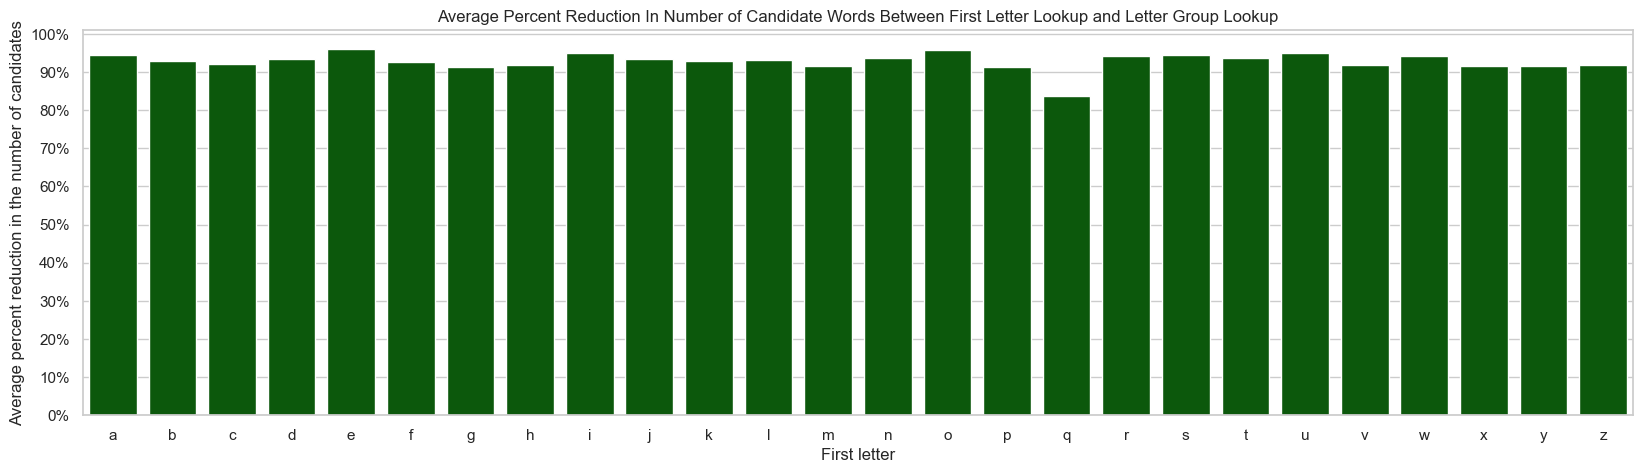

In [42]:
sns.set_theme(style = "whitegrid")
f, ax = plt.subplots(figsize = (20, 5))

my_plot = sns.barplot(data=wg_agg_df, x="first_letter", y="letter_selector_lookup_diff",
                      color='darkgreen')

y_ticks = list(range(0, 101, 10))
y_tick_labels_formatted = ['{:.0%}'.format(ytl/100) for ytl in y_ticks]   

my_plot.set_yticks(ticks = y_ticks)
my_plot.set_yticklabels(labels = y_tick_labels_formatted, rotation=0)


#ax.bar_label(ax.containers[0], fontsize=10)
plt.title(label = "Average Percent Reduction In Number of Candidate Words Between First Letter Lookup and Letter Group Lookup")
plt.xlabel(xlabel = 'First letter')
plt.ylabel(ylabel = "Average percent reduction in the number of candidates")
output_file_name = '..\\assets\\meo_5_letter_selector_lookup_diff.png'
output_file_name = os.path.normpath(output_file_name)
print(output_file_name)
my_plot.get_figure().savefig(fname = output_file_name)



# MATRIX EXTRACTION OPTION 6

In [43]:
c_wg_df.head()

,first_letter,n_chars,word_group_id,letter_selector,first_letter_id,letter_selector_id,me_03_first_letter_lookup,me_04_single_letter_lookup,me_05_letter_selector_lookup,me_06_nc_ls_lookup
0,a,1,0,a,0,0,133001,133001,133001,133001
1,a,2,1,a,0,0,133001,133001,133001,133000
2,a,3,2,la,0,1081,133001,98258,65528,65527
3,a,5,3,lai,0,1083,133001,98258,42754,42731
4,a,3,4,ma,0,1114,133001,58800,38652,38651


In [44]:
col_names = ['n_chars', 'letter_selector_id', 'letter_selector', 'me_06_nc_ls_lookup', 'first_letter']
#ls_df = c_wg_df[col_names].drop_duplicates()
ls_df = c_wg_df[col_names].groupby(col_names[:-1]).agg( number_of_lookups = ('first_letter', 'size')).reset_index()

In [45]:
ls_df['me_06_nc_ls_lookup_log'] = np.log10(ls_df['me_06_nc_ls_lookup'])

In [46]:
ls_df['me_06_nc_ls_lookup'].describe()

count     16101.000000
mean       4491.670890
std        9154.747352
min           1.000000
25%         126.000000
50%         789.000000
75%        4552.000000
max      145106.000000
Name: me_06_nc_ls_lookup, dtype: float64

..\assets\meo_6_nc_ls_group_size.png


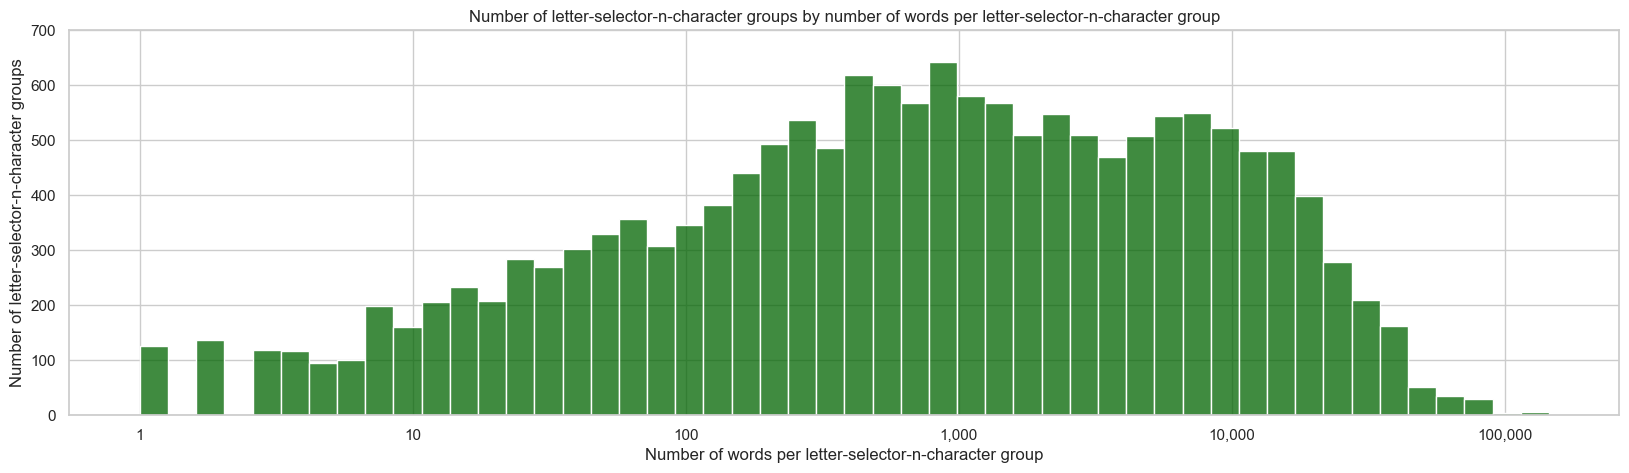

In [51]:
sns.set_theme(style = "whitegrid")
f, ax = plt.subplots(figsize = (20, 5))

my_plot = sns.histplot(data = ls_df, x = 'me_06_nc_ls_lookup_log',
                      color='darkgreen', bins = 50)

y_ticks = list(range(0, 701, 100))
y_tick_labels_formatted = ['{:,}'.format(ytl) for ytl in y_ticks]   

my_plot.set_yticks(ticks = y_ticks)
my_plot.set_yticklabels(labels = y_tick_labels_formatted, rotation=0)


plt.title(label = "Number of letter-selector-n-character groups by number of words per letter-selector-n-character group")
plt.xlabel(xlabel = 'Number of words per letter-selector-n-character group')
plt.ylabel(ylabel = "Number of letter-selector-n-character groups")

x_ticks = list(range(0,6))
x_tick_labels_formatted = ['{:,}'.format(10**xtl) for xtl in x_ticks]   

my_plot.set_xticks(ticks = x_ticks)
my_plot.set_xticklabels(labels = x_tick_labels_formatted, rotation=0)

output_file_name = '..\\assets\\meo_6_nc_ls_group_size.png'
output_file_name = os.path.normpath(output_file_name)
print(output_file_name)
my_plot.get_figure().savefig(fname = output_file_name)

..\assets\meo_6_nc_ls_lookup_diff.png


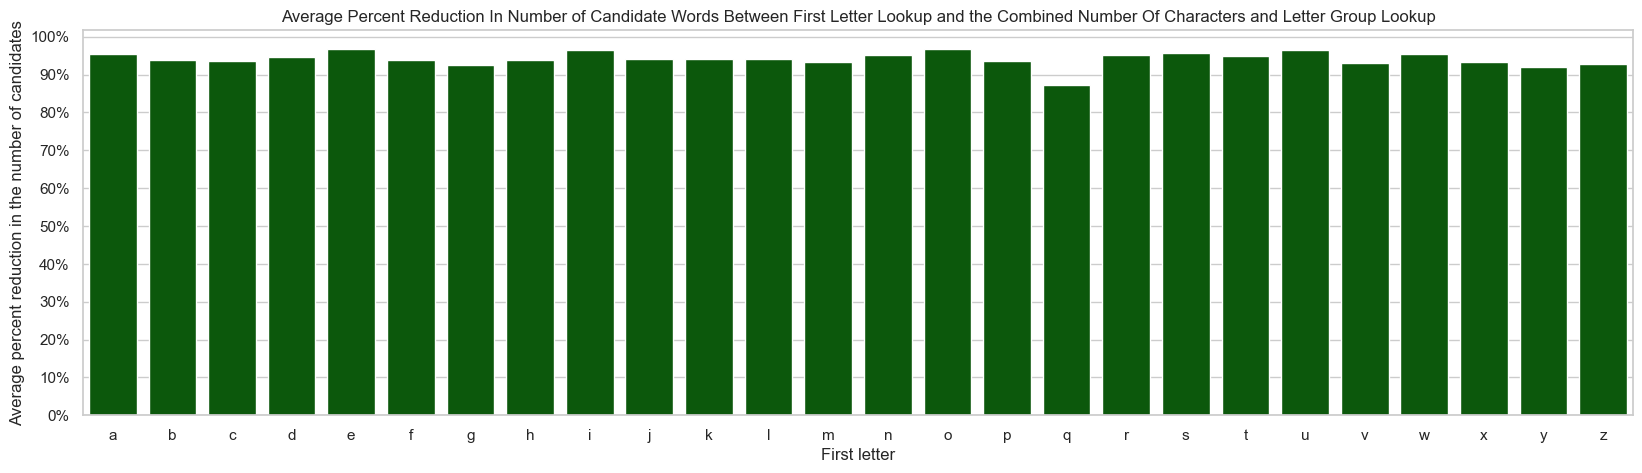

In [52]:
sns.set_theme(style = "whitegrid")
f, ax = plt.subplots(figsize = (20, 5))

my_plot = sns.barplot(data=wg_agg_df, x="first_letter", y="nc_ls_lookup_diff",
                      color='darkgreen')
#ax.bar_label(ax.containers[0], fontsize=10)


y_ticks = list(range(0, 101, 10))
y_tick_labels_formatted = ['{:.0%}'.format(ytl/100) for ytl in y_ticks]   

my_plot.set_yticks(ticks = y_ticks)
my_plot.set_yticklabels(labels = y_tick_labels_formatted, rotation=0)

plt.title(label = "Average Percent Reduction In Number of Candidate Words Between First Letter Lookup and the Combined Number Of Characters and Letter Group Lookup")
plt.xlabel(xlabel = 'First letter')
plt.ylabel(ylabel = "Average percent reduction in the number of candidates")
output_file_name = '..\\assets\\meo_6_nc_ls_lookup_diff.png'
output_file_name = os.path.normpath(output_file_name)
print(output_file_name)
my_plot.get_figure().savefig(fname = output_file_name)



In [53]:
wg_agg_df.head()

,first_letter,first_letter_lookup,single_letter_lookup,letter_selector_lookup,nc_ls_lookup,single_letter_lookup_diff,letter_selector_lookup_diff,nc_ls_lookup_diff
0,a,2196245513,735961555,123072353,101884494,66.490014,94.396239,95.360970
1,b,366010797,293952235,26375678,22807798,19.687551,92.793743,93.768545
2,c,1519893288,836696574,119346318,96419559,44.950308,92.147717,93.656163
3,d,584968780,402583707,38770995,31106179,31.178599,93.372126,94.682421
4,e,1203944482,302954766,46057706,37627150,74.836484,96.174433,96.874677


In [54]:
c_wg_df.head()

,first_letter,n_chars,word_group_id,letter_selector,first_letter_id,letter_selector_id,me_03_first_letter_lookup,me_04_single_letter_lookup,me_05_letter_selector_lookup,me_06_nc_ls_lookup
0,a,1,0,a,0,0,133001,133001,133001,133001
1,a,2,1,a,0,0,133001,133001,133001,133000
2,a,3,2,la,0,1081,133001,98258,65528,65527
3,a,5,3,lai,0,1083,133001,98258,42754,42731
4,a,3,4,ma,0,1114,133001,58800,38652,38651


In [55]:
c_wg_df.shape

(215842, 10)

In [56]:
col_names = ['letter_selector', 'first_letter_id', 
              'letter_selector_id', 'first_letter']
#ls_df = c_wg_df[col_names].drop_duplicates()
ls_df = c_wg_df[col_names].groupby(col_names[:-1]).agg(
     number_of_lookups = ('first_letter', 'size')).reset_index()

In [57]:
ls_df.shape

(13009, 4)

# INDIVIDUAL TIMING

In [58]:
sql = 'select * from matrix_extraction_timing;'
met_df = query_db(sql = sql, db_path = rc.db_path,
              db_name = rc.db_name)

...query execution took: 0.01 seconds...


In [59]:
met_df = met_df.set_index(keys = 'Matrix Extraction')

In [60]:
met_df.head()

,Option 1,Option 2,Option 3,Option 4,Option 5,Option 6
Matrix Extraction,,,,,,
Option 1,1.000000,1.207226,1.661513,11.609015,149.675488,181.923624
Option 2,0.828345,1.000000,1.376307,9.616273,123.982978,150.695568
Option 3,0.601861,0.726582,1.000000,6.987013,90.083825,109.492717
Option 4,0.086140,0.103990,0.143123,1.000000,12.893039,15.670892
Option 5,0.006681,0.008066,0.011101,0.077561,1.000000,1.215454


..\assets\meo_x_comp_times.png


<Figure size 1920x1440 with 0 Axes>

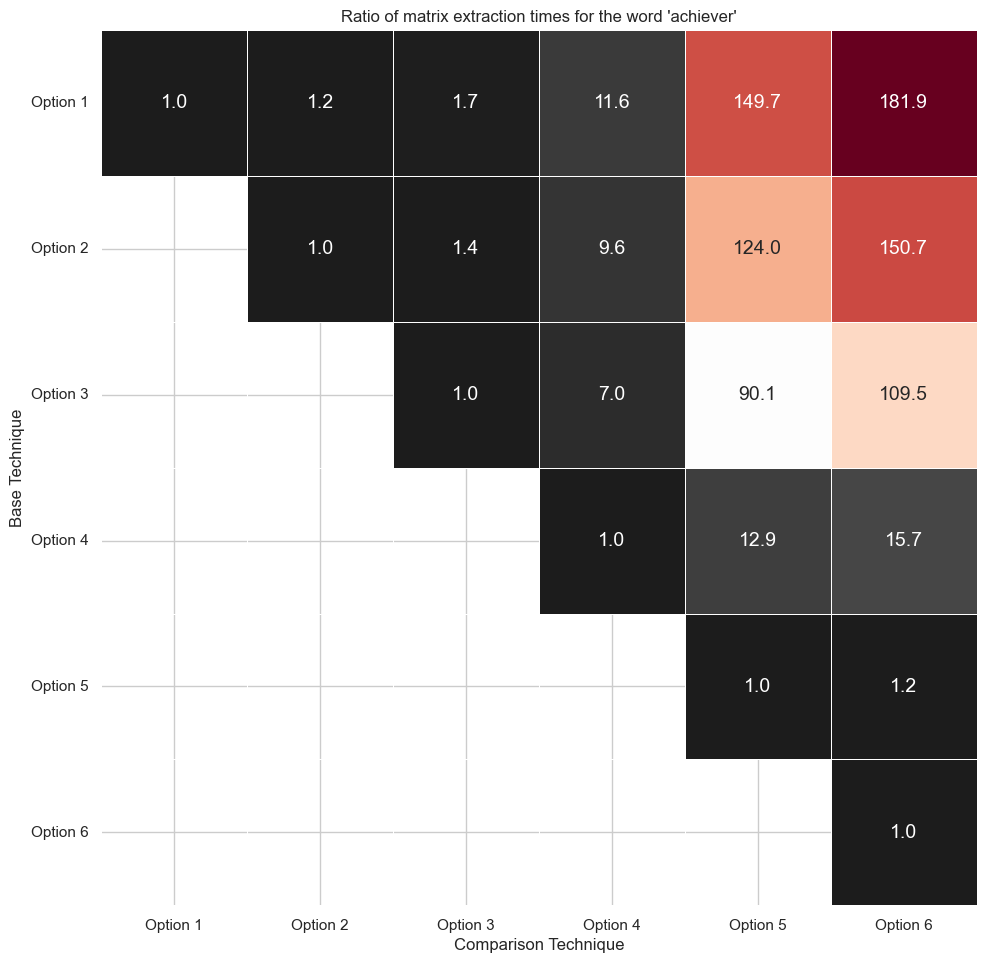

In [61]:
# make another heatmap
im_data = met_df.to_numpy()
im_data_mask = im_data < 1

sns.set_theme(style = "whitegrid")
plt.figure(dpi = 300)

f, ax = plt.subplots(figsize = (10, 10))

norm = plt.Normalize(im_data.min(), im_data.max())

my_plot = sns.heatmap(data = im_data, cmap = 'RdGy_r', norm = norm,
            square = True, linewidths=.5, cbar = False,
            annot=True, fmt='.1f',
            annot_kws={"size": 14},
            mask = im_data_mask)            

my_plot.set_yticklabels(labels = met_df.columns, rotation=0)
my_plot.set_xticklabels(labels = met_df.columns, rotation=0)
plt.title(label = "Ratio of matrix extraction times for the word 'achiever'")
plt.xlabel(xlabel = 'Comparison Technique')
plt.ylabel(ylabel = "Base Technique")
output_file_name = '..\\assets\\meo_x_comp_times.png'
output_file_name = os.path.normpath(output_file_name)
print(output_file_name)
my_plot.get_figure().savefig(fname = output_file_name)
plt.tight_layout()
plt.show()

# OVERALL RATIOS OF DIFFERENCE

In [62]:
# load several tables from sqlite to aid with visualization
df_list = []
base_sql = 'select * from words_me_{}'
for tn in range(1, 7):
    sql = base_sql.format(str(tn).zfill(2))
    print(sql)
    df = query_db(sql = sql, db_path = rc.db_path, db_name = rc.db_name)
    df_list.append(df)


select * from words_me_01
...query execution took: 0.89 seconds...
select * from words_me_02
...query execution took: 0.87 seconds...
select * from words_me_03
...query execution took: 0.92 seconds...
select * from words_me_04
...query execution took: 0.89 seconds...
select * from words_me_05
...query execution took: 0.94 seconds...
select * from words_me_06
...query execution took: 0.89 seconds...


In [63]:
t_df = pd.concat(df_list)

In [64]:
t_df.shape

(1295052, 5)

In [65]:
# let's aggregate by technique
t_df_agg = t_df[['matrix_extraction_option', 'n_seconds']].groupby(['matrix_extraction_option']).agg(tot_seconds = ('n_seconds', 'sum')).reset_index()

In [71]:
t_df_agg['n_minutes'] = t_df_agg['tot_seconds'] / 60
t_df_agg['n_hours'] = t_df_agg['n_minutes'] / 60

In [72]:
t_df_agg.head(10)

,matrix_extraction_option,tot_seconds,n_minutes,n_hours
0,1,5463.430726,91.057179,1.517620
1,2,3135.514766,52.258579,0.870976
2,3,1832.360018,30.539334,0.508989
3,4,1008.565645,16.809427,0.280157
4,5,177.229577,2.953826,0.049230
5,6,216.320892,3.605348,0.060089


In [87]:
for my_row in t_df_agg.itertuples(index = False, name = None):    
    print('|' + '|'.join([str(round(x, 2)) for x in my_row]) + '|')


|1|5463.43|91.06|1.52|
|2|3135.51|52.26|0.87|
|3|1832.36|30.54|0.51|
|4|1008.57|16.81|0.28|
|5|177.23|2.95|0.05|
|6|216.32|3.61|0.06|


In [275]:
expanded_timing_list = []
for me_source, me_target in product(t_df_agg.values.tolist(), repeat=2):    
    # let's unpack this
    me_source_option, me_source_timing = me_source
    me_target_option, me_target_timing = me_target

    me_source_option = 'Option ' + str(int(me_source_option))
    me_target_option =  'Option ' + str(int(me_target_option))
    
    me_source_target_timing_ratio = me_source_timing / me_target_timing
    
    # add to the list
    expanded_timing_list.append([me_source_option, me_target_option, me_source_timing, me_target_timing, me_source_target_timing_ratio])    

In [276]:
col_names = ['source', 'target', 'source_timing', 'target_timing', 'timing_ratio']
ex_t_df = pd.DataFrame(data= expanded_timing_list, columns=col_names)

In [ ]:
ex_t_df.head()

In [278]:
timing_table = ex_t_df.pivot_table(index = ['source'], columns = ['target'],
                           values =['timing_ratio']).reset_index(drop = False, names = 'Matrix Extraction')

In [ ]:
timing_table.columns

In [280]:
# use a list comprehension to clean up the column names
col_names = [''.join(cn).replace('timing_ratio', '') for cn in timing_table.columns.tolist()]

In [281]:
timing_table.columns = col_names

In [282]:
timing_table = timing_table.set_index('Matrix Extraction')

In [ ]:

timing_table.head(n=10)

In [ ]:
# make another heatmap
im_data = timing_table.to_numpy()
im_data_mask = im_data < .7

sns.set_theme(style = "whitegrid")
plt.figure(dpi = 300)

f, ax = plt.subplots(figsize = (10, 10))

norm = plt.Normalize(im_data.min(), im_data.max())

my_plot = sns.heatmap(data = im_data, cmap = 'RdGy_r', norm = norm,
            square = True, linewidths=.5, cbar = False,
            annot=True, fmt='.1f',
            annot_kws={"size": 14},
            mask = im_data_mask)            

my_plot.set_yticklabels(labels = met_df.columns, rotation=0)
my_plot.set_xticklabels(labels = met_df.columns, rotation=0)
plt.title(label = "Ratio of matrix extraction times for all words")
plt.xlabel(xlabel = 'Comparison Technique')
plt.ylabel(ylabel = "Base Technique")
output_file_name = '..\\assets\\meo_x_comp_times_all_words.png'
output_file_name = os.path.normpath(output_file_name)
print(output_file_name)
my_plot.get_figure().savefig(fname = output_file_name)
plt.tight_layout()
plt.show()

In [285]:
# graphics to make:
# total time for all words
# average search space counts and ratios

In [286]:
value_cols = ['me_01_full_matrix_lookup',
           'me_02_n_char_lookup',
           'me_03_first_letter_lookup',
           'me_04_single_letter_lookup',
           'me_05_letter_selector_lookup',
           'me_06_nc_ls_lookup']

wg_lu_melt = wg_lu_df.melt(id_vars = ['word_group_id'],value_vars = value_cols,
                           var_name = 'matrix_extraction',
                           value_name='candidate words')

In [287]:
wg_lu_melt['matrix_extraction'] = wg_lu_melt['matrix_extraction'].str[3:5]

In [288]:
# before we can make a box plot, we need to melt the dataframe
testo = wg_lu_melt.loc[wg_lu_melt['matrix_extraction'] != '01', :]

In [ ]:
sns.set_theme(style = "whitegrid")
plt.figure(dpi = 300)

f, ax = plt.subplots(figsize = (20, 10))
my_plot = sns.boxplot(data = testo, x = 'matrix_extraction', 
                      y = 'candidate words', linewidth = 2,
                      fliersize=2, color = 'darkgreen')

y_tick_labels = list(range(0, 220001, 10000))
y_tick_labels_formatted = ['{:,}'.format(ytl) for ytl in y_tick_labels]   

my_plot.set_yticks(ticks = y_tick_labels)
my_plot.set_yticklabels(labels = y_tick_labels_formatted, rotation=0)

x_ticks = range(0, testo['matrix_extraction'].unique().shape[0])
x_tick_labels = ['Option ' + str(ii) for ii in range(2, 7)]

my_plot.set_xticks(ticks = x_ticks)
my_plot.set_xticklabels(labels = x_tick_labels, rotation=0)
plt.title(label = "Search space distribution by matrix extraction technique")
plt.xlabel(xlabel = 'Matrix extraction technique')
plt.ylabel(ylabel = 'Number of candidate words in the search space')
output_file_name = '..\\assets\\meo_x_box_plot_distribution.png'
output_file_name = os.path.normpath(output_file_name)
print(output_file_name)
my_plot.get_figure().savefig(fname = output_file_name)
plt.tight_layout()
plt.show()
